In [1]:
import numpy                 as np
import pandas                as pd
import matplotlib.pyplot     as plt
import datetime
import seaborn               as sns

Read Niche Scraper Data

In [2]:
#read the Niche Scraper data
BH = pd.read_csv('Niche Scraper - Beauty _ Health.csv', encoding='latin1')

In [3]:
BH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422 entries, 0 to 2421
Data columns (total 12 columns):
product_name       2422 non-null object
recentorders       2422 non-null object
aliproduct_link    2422 non-null object
todser_link        2422 non-null object
sellwithtopdser    2422 non-null object
price              2422 non-null object
total_orders       2422 non-null object
recent_orders      2422 non-null object
aliscore           2422 non-null float64
growth             2422 non-null object
competition        2422 non-null float64
country            2422 non-null object
dtypes: float64(2), object(10)
memory usage: 227.1+ KB


# WordClouds
## This could help verify whether the data belongs to the right category

In [4]:
word_lists = BH['product_name'].apply(lambda x: x.split(" "))

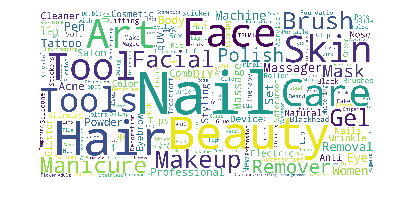

In [5]:
from nltk.corpus import stopwords
import string
extended_stop = ['For','for','And','0',"'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must',\
                   "n't", 'need', 'sha', 'wo', 'would','llc','inc','not','co','ltd','com','corp','m',\
                  '','be','ig','have','£','tweet','st','pm','let','\u2066\u2069','iam','w',\
                  'ma','t','v','eth','c','','b','d','bc']
stop = stopwords.words("english") + list(string.punctuation) + extended_stop

words_dict = dict()
for l in word_lists:
    for w in l:
        if w not in extended_stop:
            if words_dict.get(w):
                words_dict[w] += 1
            else:
                words_dict[w] = 1

results = sorted(words_dict.items(),key=lambda x: x[1],reverse=True) 

from wordcloud import WordCloud

wc_dict = words_dict.copy()
# wc_dropped = ["invest","financial","finance",'planning']
# for w in wc_dropped:
#     wc_dict.pop(w)
    
wc = WordCloud(background_color='white',width=2000,height=1000)
wc.generate_from_frequencies(wc_dict)
plt.imshow(wc)
plt.axis("off")
plt.show()

wc.to_file('wc-BH.png')

# Data Cleaning

In [6]:
BH.head(5)

,product_name,recentorders,aliproduct_link,todser_link,sellwithtopdser,price,total_orders,recent_orders,aliscore,growth,competition,country
0,\n Gel Nail Polish UV L...,"\n +4,557 \n The...",https://www.aliexpress.com/item/10050023964660...,https://app.topdser.com//ns?loginAccount=10317...,\n Sell with Topdse...,\n \n ...,\n \n ...,\n \n ...,86.26,30.75%,17.0,US
1,\n Chestnut Velvet Matt...,"\n +1,390 \n The...",https://www.aliexpress.com/item/10050019433149...,https://app.topdser.com//ns?loginAccount=10317...,\n Sell with Topdse...,\n \n ...,\n \n ...,\n \n ...,79.20,18.67%,12.0,RU
2,\n Heatless Curling Rod...,"\n +1,240 \n The...",https://www.aliexpress.com/item/10050023837369...,https://app.topdser.com//ns?loginAccount=10317...,\n Sell with Topdse...,\n \n ...,\n \n ...,\n \n ...,75.20,10.67%,7.0,CL
3,\n Facial Massage Rolle...,"\n +2,177 \n The...",https://www.aliexpress.com/item/10050016665019...,https://app.topdser.com//ns?loginAccount=10317...,\n Sell with Topdse...,\n \n ...,\n \n ...,\n \n ...,71.85,8.33%,11.0,FR
4,\n Clean Face Mask Beau...,\n +148 \n The n...,https://www.aliexpress.com/item/10050020276554...,https://app.topdser.com//ns?loginAccount=10317...,\n Sell with Topdse...,\n \n ...,\n \n ...,\n \n ...,71.58,3.17%,2.0,PK


In [7]:
#clean the text
def clean_text(text):
    drop_list=['\n','+','  ','Total Orders','Recent Orders','The number of new orders this week']
    for i in drop_list:
        text = text.replace(i,'')
    text = text.strip(' ')
    return text

#Turn orders into integer
def int_orders(order):
    order = int(order.replace(',',''))
    return order

#Turn price range into average price
def avg_price(price):
    if '-' in price.split(' '):
        lower_p_str = price.split(' ')[0]
        upper_p_str = price.split(' ')[2]
        lower_p_num = float(lower_p_str.split('$')[1])
        upper_p_num = float(upper_p_str.split('$')[1])
        avg_price = (lower_p_num + upper_p_num) / 2
    else:
        avg_price = float(price.split(' ')[0].split('$')[1])
    return avg_price

#data cleaning
def clean_data(df):
    # clean the string variables
    for index in df.columns[:-4]:
        df[index] = df[index].apply(clean_text)
    
    # turn orders into int variables
    df['total_orders'] = df['total_orders'].apply(int_orders)
    df['recent_orders'] = df['recent_orders'].apply(int_orders)

    # calculate the average price
    df['avg_price'] = df['price'].apply(avg_price)
    
    #calculate the GMVs
    df['total_GMV'] = df['avg_price']*df['total_orders']
    df['recent_GMV'] = df['avg_price']*df['recent_orders']
    return df

In [8]:
BH = clean_data(BH)
BH

,product_name,recentorders,aliproduct_link,todser_link,sellwithtopdser,price,total_orders,recent_orders,aliscore,growth,competition,country,avg_price,total_GMV,recent_GMV
0,Gel Nail Polish UV LED Art Mirineer All For Ma...,"4,557 .",https://www.aliexpress.com/item/10050023964660...,https://app.topdser.com//ns?loginAccount=10317...,Sell with Topdser,$0.01,18145,4557,86.26,30.75%,17.0,US,0.010,181.450,45.570
1,Chestnut Velvet Matte Liquid Lipstick Waterpro...,"1,390 .",https://www.aliexpress.com/item/10050019433149...,https://app.topdser.com//ns?loginAccount=10317...,Sell with Topdser,$0.70 - $2.20,13335,1390,79.20,18.67%,12.0,RU,1.450,19335.750,2015.500
2,Heatless Curling Rod Headband No Heat Curls Ri...,"1,240 .",https://www.aliexpress.com/item/10050023837369...,https://app.topdser.com//ns?loginAccount=10317...,Sell with Topdser,$0.01 - $0.84,7978,1240,75.20,10.67%,7.0,CL,0.425,3390.650,527.000
3,Facial Massage Roller Guasha Board Double Head...,"2,177 .",https://www.aliexpress.com/item/10050016665019...,https://app.topdser.com//ns?loginAccount=10317...,Sell with Topdser,$2.37 - $3.18,15305,2177,71.85,8.33%,11.0,FR,2.775,42471.375,6041.175
4,Clean Face Mask Beauty Skin Green Tea Clean Fa...,148 .,https://www.aliexpress.com/item/10050020276554...,https://app.topdser.com//ns?loginAccount=10317...,Sell with Topdser,$4.66 - $8.99,1863,148,71.58,3.17%,2.0,PK,6.825,12714.975,1010.100
5,7 Colors Light LED Facial Mask With Neck Skin ...,71 .,https://www.aliexpress.com/item/10050020592947...,https://app.topdser.com//ns?loginAccount=10317...,Sell with Topdser,$34.00 - $37.60,842,71,70.97,1.83%,1.0,FR,35.800,30143.600,2541.800
6,Green Tea Cleansing Clay Stick Mask Acne Clean...,122 .,https://www.aliexpress.com/item/10050022598164...,https://app.topdser.com//ns?loginAccount=10317...,Sell with Topdser,$2.62 - $3.32,624,122,69.82,0.83%,2.0,CZ,2.970,1853.280,362.340
7,Heatless Curling Rod Headband No Heat Curls Ri...,95 .,https://www.aliexpress.com/item/10050024742104...,https://app.topdser.com//ns?loginAccount=10317...,Sell with Topdser,$0.01 - $0.97,409,95,69.98,0.50%,1.0,ES,0.490,200.410,46.550
8,USB EMS muscle stimulator fitness weightliftin...,55 .,https://www.aliexpress.com/item/10050020839905...,https://app.topdser.com//ns?loginAccount=10317...,Sell with Topdser,$4.98 - $19.98,1326,55,68.57,1.83%,7.0,JP,12.480,16548.480,686.400
9,Heatless Curling Rod Headband No Heat Curls Ri...,439 .,https://www.aliexpress.com/item/10050024609733...,https://app.topdser.com//ns?loginAccount=10317...,Sell with Topdser,$0.01 - $3.60,1939,439,67.83,-1.83%,2.0,ES,1.805,3499.895,792.395


# Visualization

## Distribution of Countries

In [12]:
from matplotlib import font_manager as fm
from  matplotlib import cm

def dist_country(df, category):
    country_l = df['country'].unique()
    country_count = np.array([])
    for country in country_l:
        country_count = np.append(country_count, len(df[df['country']==country]))

    country_a = np.array(country_l)
    plt.figure(figsize=(10,6))
    plt.bar(country_a[np.argsort(country_count)][-15:], country_count[np.argsort(country_count)][-15:],fc='lightcoral')
    for a,b in zip(country_a[np.argsort(country_count)][-15:], country_count[np.argsort(country_count)][-15:]):
        plt.text(a, b+0.05, '%.0f' % b, ha='center', va= 'bottom',fontsize=12)
    plt.title('Top15 Countries of %s products'%category, fontsize=16)
    plt.xticks(country_a[np.argsort(country_count)][-15:],size='large',rotation=0)
    plt.xlabel('Country',fontsize=14)
    plt.ylabel('Count',fontsize=14)
    plt.show()
    

def pie_country(df):
    country_l = df['country'].unique()
    country_count = np.array([])
    for country in country_l:
        country_count = np.append(country_count, len(df[df['country']==country]))

    country_a = np.array(country_l)
    
    #to draw the pie chart
    others = np.sum(country_count) - np.sum(country_count[np.argsort(country_count)][-15:])
    labels = np.insert(country_a[np.argsort(country_count)][-15:], 0, ['Others'])
    sizes = np.insert(country_count[np.argsort(country_count)][-15:], 0, others)
    # explode 控制突出来的饼，需要手动控制
    explode = (0, 0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0) 
    # "explode" ， 非0的值显示突出的slice，值越大，离中心越远
    fig, axes = plt.subplots(figsize=(16,10),ncols=2) # 设置绘图区域大小
    ax1, ax2 = axes.ravel()

    colors = cm.rainbow(np.arange(len(sizes))/len(sizes)) # colormaps: Paired, autumn, rainbow, gray,spring,Darks
    patches, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.0f%%',explode=explode,
            shadow=False, startangle=170, colors=colors, labeldistance=1.2,pctdistance=0.7, radius=0.4)
    # labeldistance: 控制labels显示的位置
    # pctdistance: 控制百分比显示的位置
    # radius: 控制切片突出的距离

    ax1.axis('equal')  

    # 重新设置字体大小
    proptease = fm.FontProperties()
    proptease.set_size('xx-large')
    # font size include: ‘xx-small’,x-small’,'small’,'medium’,‘large’,‘x-large’,‘xx-large’ or number, e.g. '12'
    plt.setp(autotexts, fontproperties=proptease)
    plt.setp(texts, fontproperties=proptease)

    ax1.set_title('Country Percentage Pieplot', loc='center',fontsize=30)

    # ax2 只显示图例（legend）
    ax2.axis('off')
    ax2.legend(patches, labels, loc='center left',prop={'size': 16})

    plt.tight_layout()
    # plt.savefig("pie_shape_ufo.png", bbox_inches='tight')
    plt.savefig('Country_Dist_Pie.jpg')
    plt.show()


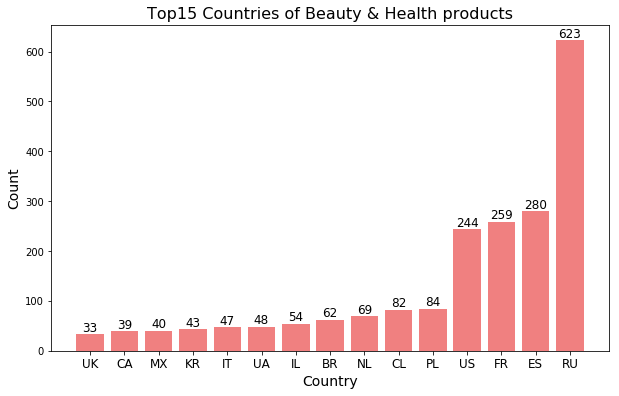

In [13]:
dist_country(BH,'Beauty & Health')

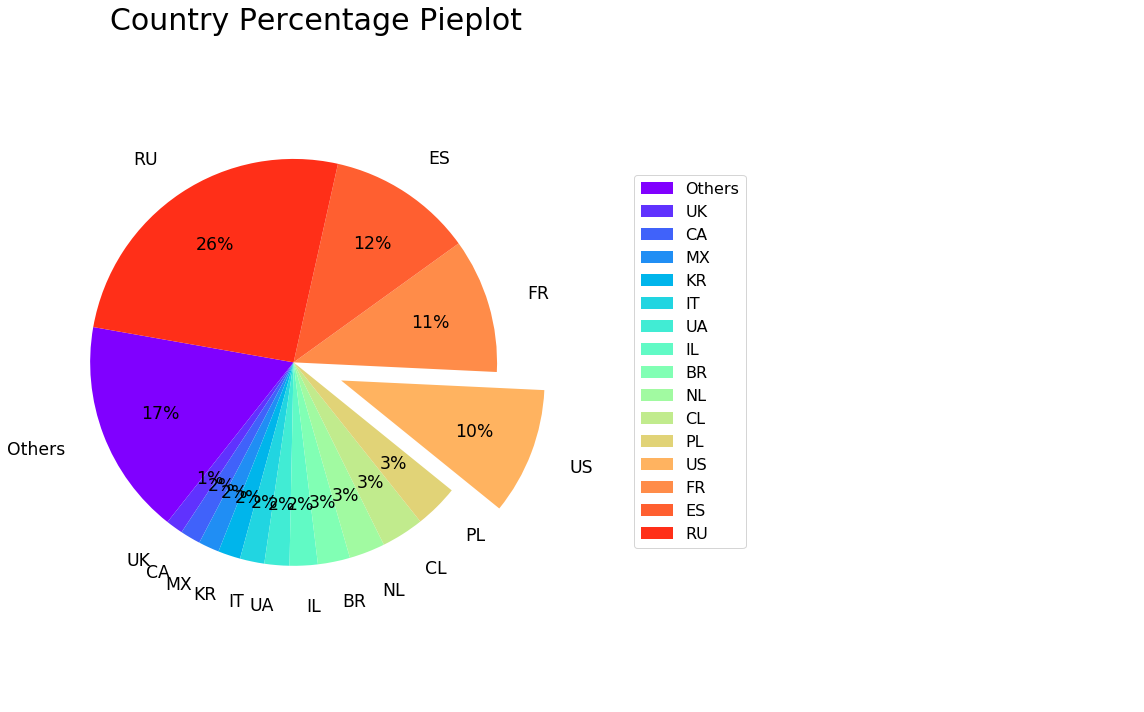

In [14]:
pie_country(BH)

### Average Price Distribution

In [15]:
def dist_price(df,category):
    plt.figure(figsize=(20,5))
    plt.hist(df['avg_price'],bins=500, density=False)
    plt.title('Overall Distribution of Average Price of %s'%category,fontsize=20)
    plt.xlabel('Average Price',fontsize=16)
    plt.ylabel('Count',fontsize=16)
    plt.show() 
    num_total = len(df)
    num_50 =len(df[df['avg_price']<=50])
    num_100 =len(df[df['avg_price']<=100])
    print('The number of %s products <=50 USD is'%category, num_50, ', making up',  '{0:.2%}'.format(num_50/num_total), 'of total')
    print('The number of %s products <=100 USD is'%category, num_100, ', making up',  '{0:.2%}'.format(num_100/num_total), 'of total')
    print('The max price for %s products is:'%category, np.max(df['avg_price']))
    print('The most expensive product is',df['product_name'].iloc[np.where(df['avg_price']==np.max(df['avg_price']))[0][0]])

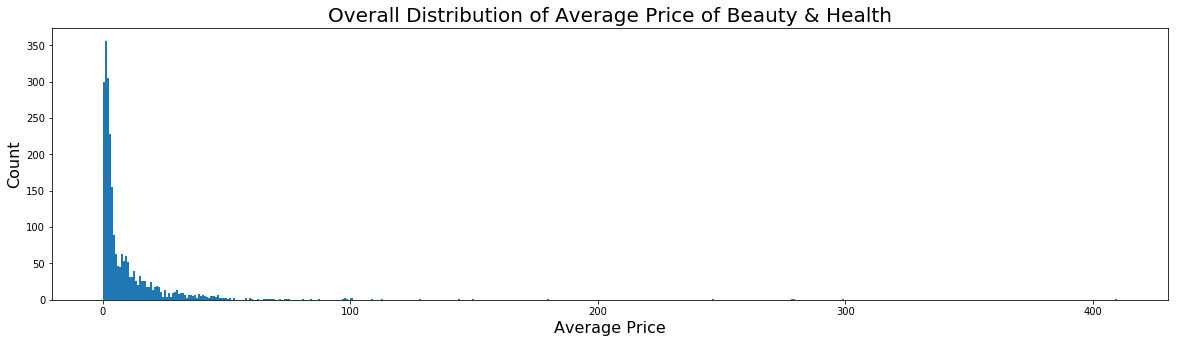

The number of Beauty & Health products <=50 USD is 2381 , making up 98.31% of total
The number of Beauty & Health products <=100 USD is 2409 , making up 99.46% of total
The max price for Beauty & Health products is: 410.0
The most expensive product is IMMETEE Hair Color Spray Hair Color Repair To Fill The Hair Color 1Pcs Color Hair Healthy Hair Dye Hair Root Refill


In [16]:
dist_price(BH, 'Beauty & Health')

In [17]:
def dist_price_div(df,category):
    plt.figure(figsize=(20,10))
    plt.subplot(221)
    plt.hist(df[df['avg_price']<=1]['avg_price'],bins=100)
    plt.title('Distribution of Average Price(0-1 USD) of %s'%category,fontsize=15)
    plt.xlabel('Average Price')
    plt.ylabel('Count')

    plt.subplot(222)
    plt.hist(df[(df['avg_price']>1)&(df['avg_price']<=50)]['avg_price'],bins=100)
    plt.title('Distribution of Average Price(1-50 USD) of %s'%category,fontsize=15)
    plt.xlabel('Average Price')
    plt.ylabel('Count')

    plt.subplot(223)
    plt.hist(df[(df['avg_price']>50)&(df['avg_price']<=100)]['avg_price'],bins=50)
    plt.title('Distribution of Average Price(50-100 USD) of %s'%category,fontsize=15)
    plt.xlabel('Average Price')
    plt.ylabel('Count')

    plt.subplot(224)
    plt.hist(df[(df['avg_price']>100)&(df['avg_price']<500)]['avg_price'],bins=50)
    plt.title('Distribution of Average Price(100-500 USD) of %s'%category,fontsize=15)
    plt.xlabel('Average Price')
    plt.ylabel('Count')

    plt.show()

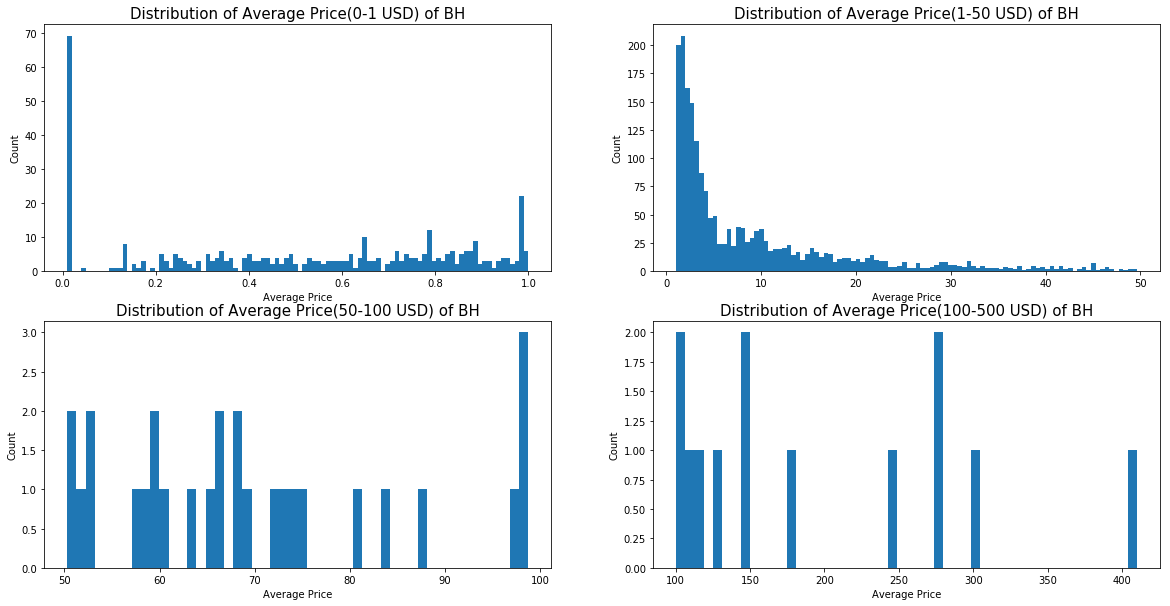

In [18]:
dist_price_div(BH,'BH')

In [22]:
print('The percentage of products <=20 USD is','{0:.2%}'.format(len(BH[(BH['avg_price']<=20)])/len(BH)))

The percentage of products <=20 USD is 87.20%


### Orders Distribution

In [23]:
def dist_orders(df, order='total_orders'):
    plt.figure(figsize=(20,5))
    plt.hist(df[df[order]>0][order],bins=100,fc='green',density=False)
    plt.title('Overall Distribution of %s(>0)'%order,fontsize=20)
    plt.xlabel('%s'%order, fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.show()
    
    print('The max %s is'%order, max(df[order]))
    print('The best seller is:',df['product_name'].iloc[np.where(df[order]==np.max(df[order]))[0][0]])
    print('The 90th percentage is', np.percentile(df[order], 90))
    print('The 95th percentage is', np.percentile(df[order], 95))

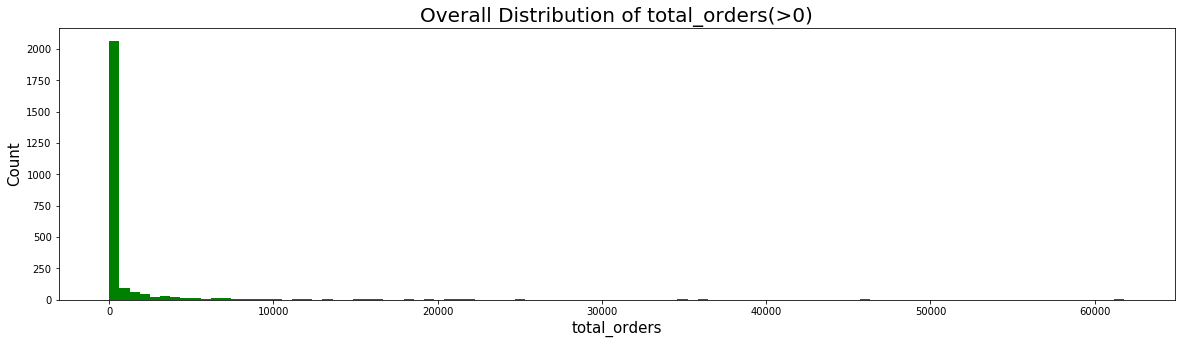

The max total_orders is 61776
The best seller is: 2PC Jade Stone Facial Massage Roller For Face Natural Massager Green Guasha Scraper Set Thin Lift Beauty Slimming Tools Roller
The 90th percentage is 1555.2000000000016
The 95th percentage is 3338.2499999999973


In [24]:
dist_orders(BH,'total_orders')

In [25]:
def dist_orders_div(df, order='total_orders'):    
    per_90 = np.percentile(df[order], 90)
    per_95 = np.percentile(df[order], 95)
    plt.figure(figsize=(20,5))
    plt.subplot(131)
    plt.hist(df[(df[order]>0)&(df[order]<=per_90)][order],bins=50,fc='green')
    plt.title('Distribution of %s(last 90 percent)'%order,fontsize=15)
    plt.xlabel('%s'%order)
    plt.ylabel('Count')

    plt.subplot(132)
    plt.hist(df[(df[order]>per_90)&(df[order]<=per_95)][order],bins=50,fc='green')
    plt.title('Distribution of %s(top 5-10 percent)'%order,fontsize=15)
    plt.xlabel('%s'%order)
    plt.ylabel('Count')

    plt.subplot(133)
    plt.hist(df[df[order]>per_95][order],bins=50,fc='green')
    plt.title('Distribution of %s(top 5 percent)'%order,fontsize=15)
    plt.xlabel('%s'%order)
    plt.ylabel('Count')

    plt.show()

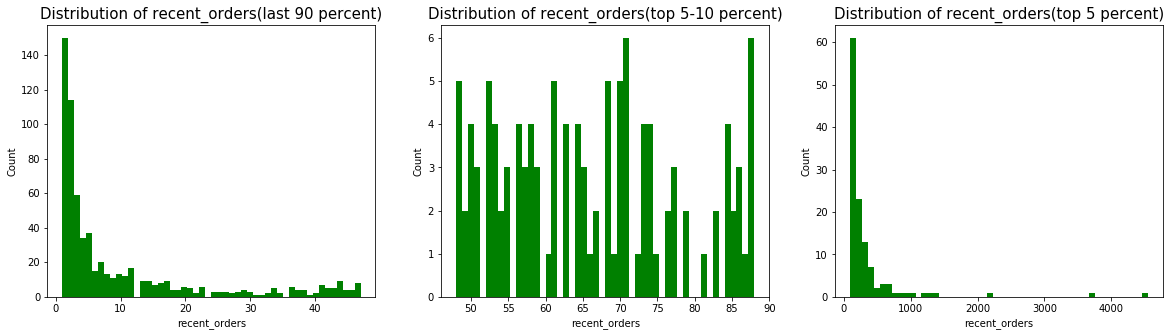

In [26]:
dist_orders_div(BH, order='recent_orders')

### Aliscore Distribution

In [34]:
def dist_aliscore(df):
    plt.figure(figsize=(20,5))
#     plt.figure(figsize=(20,5))
    plt.hist(df['aliscore'],bins=100,fc='darkorange')
    plt.title('Overall Distribution of Aliscore',fontsize=20)
    #plot 50/90 percentile vertical line 可手动调节
    plt.axvline(np.percentile(df['aliscore'], 50), c='r')
    plt.axvline(np.percentile(df['aliscore'], 90), c='r')
    plt.xlabel('Aliscore',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.show()
    print('The max Aliscore is', max(df['aliscore']))
    print('The 90th percentage is', np.percentile(df['aliscore'], 90))
    print('The 95th percentage is', np.percentile(df['aliscore'], 95))

def dist_aliscore_40(df):    
    plt.figure(figsize=(20,5))
    plt.hist(df[df['aliscore']>=40]['aliscore'],bins=100,fc='darkorange')
    plt.title('Distribution of Aliscore >=40',fontsize=20)
    plt.xlabel('Aliscore',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.show()

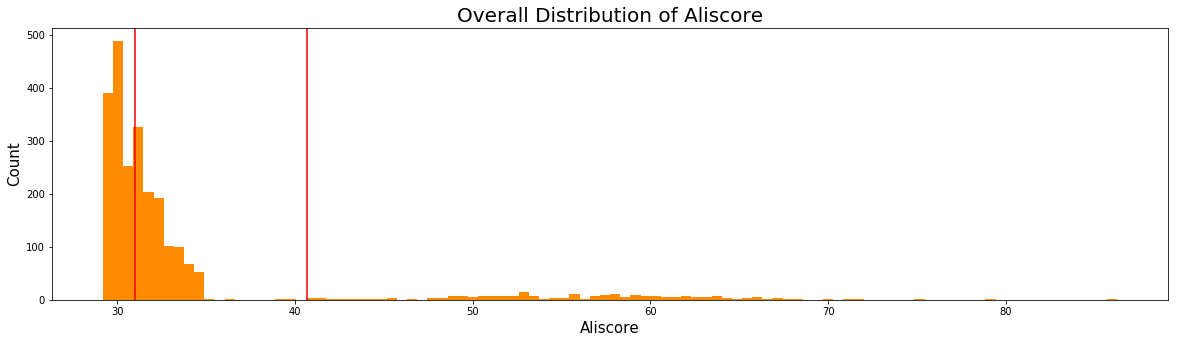

The max Aliscore is 86.26
The 90th percentage is 40.680000000000106
The 95th percentage is 55.99749999999999


In [35]:
dist_aliscore(BH)

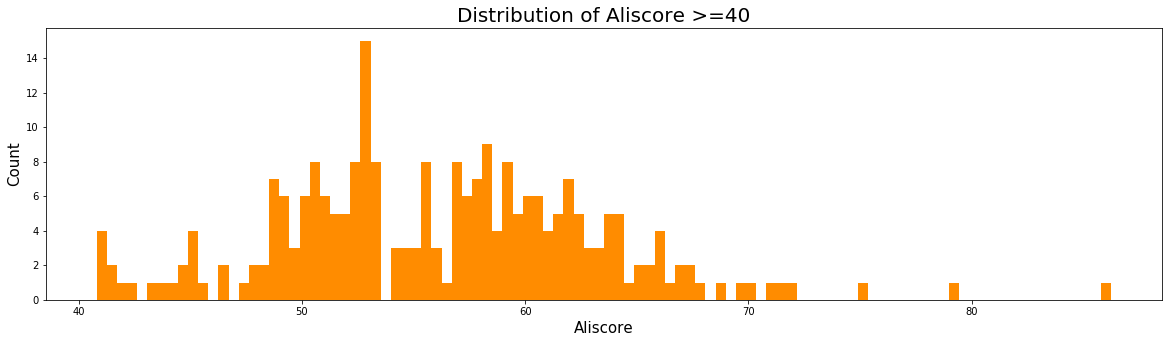

In [36]:
dist_aliscore_40(BH)

#### Correlation of Aliscore

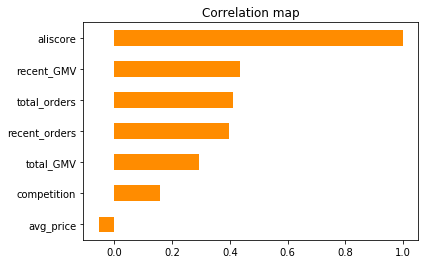

In [37]:
BH.corr()['aliscore'].sort_values().plot(kind='barh',color='darkorange')
plt.title('Correlation map')
plt.show()

### Competition Score Distribution 

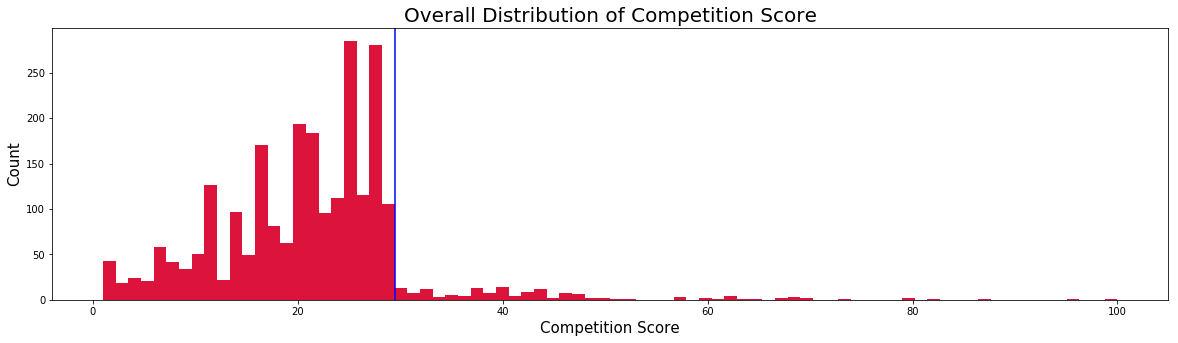

The max competition is 1.0
The best seller is: 7 Colors Light LED Facial Mask With Neck Skin Rejuvenation Face Care Treatment Beauty Anti Acne Therapy Whitening Skin Machine
The 90th percentage is 10.0
The 95th percentage is 6.0


In [40]:
def dist_com(df):
    plt.figure(figsize=(20,5))
    plt.hist(df['competition'],bins=80,fc='crimson')
    plt.title('Overall Distribution of Competition Score',fontsize=20)
    #you can manually set this threshold to filter out abnormal data
    plt.axvline(29.5, c='b')
    plt.xlabel('Competition Score',fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.show()
    
    print('The max competition is', min(df['competition']))
    print('The best seller is:',df['product_name'].iloc[np.where(df['competition']==np.min(df['competition']))[0][0]])
    print('The 90th percentage is', np.percentile(df['competition'], 10))
    print('The 95th percentage is', np.percentile(df['competition'], 5))
dist_com(BH)

In [41]:
print('The num of data <threshold is',len(BH[BH['competition']<=29.5]))
print('making up','{0:.2%}'.format(len(BH[BH['competition']<=29.5])/len(BH)))

The num of data <threshold is 2270
making up 93.72%


#### Correlation of Competition Score

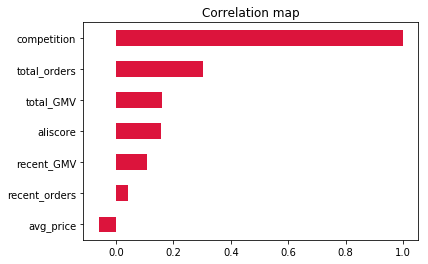

In [42]:
BH.corr()['competition'].sort_values().plot(kind='barh',color='crimson')
plt.title('Correlation map')
plt.show()

### Distribution of GMV

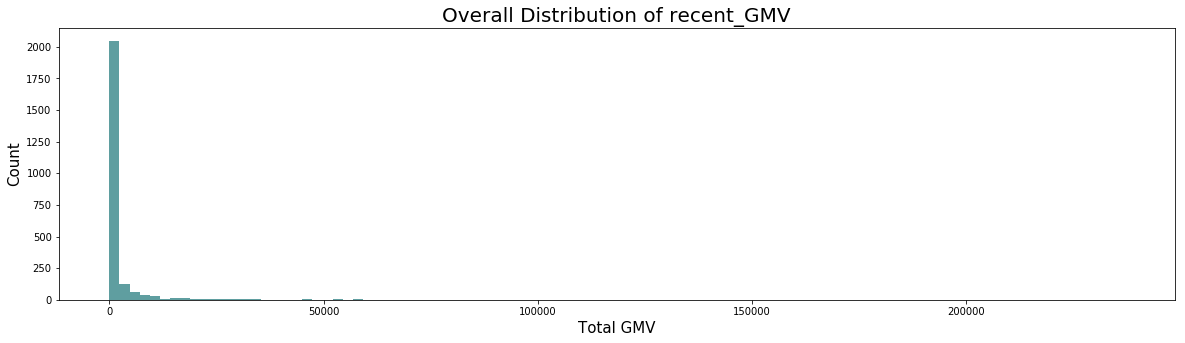

In [45]:
plt.figure(figsize=(20,5))
plt.hist(BH['total_GMV'],bins=100,fc='cadetblue')
plt.title('Overall Distribution of recent_GMV',fontsize=20)
# plt.axvline(34.35, c='r')
# plt.axvline(52.68, c='r')
plt.xlabel('Total GMV',fontsize = 15)
plt.ylabel('Count',fontsize = 15)
plt.show()

In [46]:
print(np.mean(BH['total_GMV']))
print(np.max(BH['total_GMV']))
print(np.percentile(BH['total_GMV'],50))
print(np.percentile(BH['total_GMV'],90))
print(np.percentile(BH['total_GMV'],95))

3282.5927477291516
236789.98
160.12
4978.207500000003
12420.348249999972


# Set the right threshold for target list

Let's assume our target group for Customer Electronics has the Competition <= 30, shipping destination: US

Sort the target list by Competition

In [47]:
target_BH=BH[(BH['country'] == 'US')&(BH['competition']<=30)].sort_values('competition',ascending=True).drop(columns=['recentorders','sellwithtopdser','todser_link'])
# target_BH.to_csv('targetlist_Beauty & Health.csv')
target_BH

,product_name,aliproduct_link,price,total_orders,recent_orders,aliscore,growth,competition,country,avg_price,total_GMV,recent_GMV
256,VIP-LINK 3 Colors Beauty,https://www.aliexpress.com/item/4001262845741....,$12.40 - $19.65,409,0,34.80,0.00%,1.0,US,16.025,6554.225,0.000
282,Silicone Lip Plumper Device Automatic Lip Plum...,https://www.aliexpress.com/item/32955423379.html,$18.75,86,3,34.60,0.00%,2.0,US,18.750,1612.500,56.250
277,Skin care Beauty Moisturizing Ion Mask Apparat...,https://www.aliexpress.com/item/10050018604346...,$20.80,158,0,34.60,0.00%,2.0,US,20.800,3286.400,0.000
267,ROHWXY Poly UV Gel All For Manicure Tools Colo...,https://www.aliexpress.com/item/10050017102771...,$1.48 - $1.68,3339,1,34.63,0.08%,2.0,US,1.580,5275.620,1.580
300,LED Mask Facial Whitening Skin Tighten Anti-Ag...,https://www.aliexpress.com/item/10050015102425...,$22.47,124,0,34.40,0.00%,3.0,US,22.470,2786.280,0.000
303,Face Clean Pore Vacuum Blackhead Remover Skin ...,https://www.aliexpress.com/item/4000078415704....,$14.60 - $15.82,1064,19,34.28,-0.33%,3.0,US,15.210,16183.440,288.990
314,1PC Quick Dry Eyelash Glue Waterproof False Ey...,https://www.aliexpress.com/item/4000549030536....,$1.14 - $2.58,102,0,34.20,0.00%,4.0,US,1.860,189.720,0.000
384,EMS Stimulate Body Slimming Massager Ultrasoni...,https://s.click.aliexpress.com/e/_d7oJn6t,$18.81,940,35,33.70,-1.33%,4.0,US,18.810,17681.400,658.350
343,7 Colors Light LED Facial Mask With Neck Skin ...,https://www.aliexpress.com/item/4001021513013....,$26.29 - $32.89,207,0,34.00,0.00%,5.0,US,29.590,6125.130,0.000
330,2pcs Volumizing Hair Root Clip Hair Curler Cli...,https://www.aliexpress.com/item/10050013393951...,$0.95 - $1.87,594,0,34.00,0.00%,5.0,US,1.410,837.540,0.000


In [48]:
len(target_BH[target_BH['competition']<=10])

31

Use word Cloud to see what's in the target list

In [49]:
word_lists = target_BH['product_name'].iloc[:31].apply(lambda x: x.split(" "))

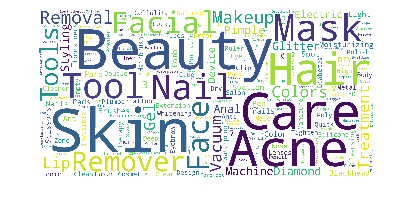

In [50]:
from nltk.corpus import stopwords
import string
extended_stop = ['For','for','And','0',"'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must',\
                   "n't", 'need', 'sha', 'wo', 'would','llc','inc','not','co','ltd','com','corp','m',\
                  '','be','ig','have','£','tweet','st','pm','let','\u2066\u2069','iam','w',\
                  'ma','t','v','eth','c','','b','d','bc']
stop = stopwords.words("english") + list(string.punctuation) + extended_stop

words_dict = dict()
for l in word_lists:
    for w in l:
        if w not in extended_stop:
            if words_dict.get(w):
                words_dict[w] += 1
            else:
                words_dict[w] = 1

results = sorted(words_dict.items(),key=lambda x: x[1],reverse=True) 

from wordcloud import WordCloud

wc_dict = words_dict.copy()
# wc_dropped = ["invest","financial","finance",'planning']
# for w in wc_dropped:
#     wc_dict.pop(w)
    
wc = WordCloud(background_color='white',width=2000,height=1000)
wc.generate_from_frequencies(wc_dict)
plt.imshow(wc)
plt.axis("off")
plt.show()

# wc.to_file('wc-BH.png')

target data summary

In [40]:
target_BH.describe()

,total_orders,recent_orders,aliscore,competition,avg_price,total_GMV,recent_GMV
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000
mean,520.621739,31.243478,33.328652,19.526087,9.641826,3559.210478,113.062609
std,2058.061555,301.885446,8.450677,6.998859,13.803316,17093.454543,675.710344
min,4.000000,0.000000,29.200000,1.000000,0.010000,1.290000,0.000000
25%,14.000000,0.000000,30.000000,15.000000,1.762500,64.027500,0.000000
50%,59.500000,0.000000,31.000000,21.000000,3.900000,248.610000,0.000000
75%,206.000000,2.000000,32.400000,25.000000,12.585000,1068.487500,8.875000
max,21954.000000,4557.000000,86.260000,30.000000,100.460000,236382.380000,9443.240000
